<a href="https://colab.research.google.com/github/salmabenhassin/DrugDiscovery/blob/main/DRugDisc23_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-generativeai
!pip install rdkit
!pip install py3Dmol
!pip install groq

In [ ]:
!pip install cohere

In [ ]:
# Input from user
amino_acid_sequence = input("Enter the amino acid sequence of the virus: ")
virus_name = input("Enter the virus name: ")


Enter the amino acid sequence of the virus: MGARASVLSGGELDRWEKIRLRPGGKKKYRLKHLVWASRELERFALNPGLLETAEGPEK
Enter the virus name:  VRC01 


In [ ]:
from groq import Groq
import os
from rdkit import Chem
from rdkit.Chem import Draw
import cohere

# Configure API keys
os.environ['GROQ_API_KEY'] = ''

# User customizable prompt for LLaMA3
amino_acid_sequence = input("Enter the amino acid sequence of the virus: ")
virus_name = input("Enter the virus name: ")
llama3_user_prompt = f"""
You are a researcher working on chemical structures. Provide only and without any description a SMILES structure for a ligand that does not already exist to target a virus for use in drug discovery.
The ligand should contain the following features:
- A benzene ring
- A carboxylic acid group
- An amine group attached to the benzene ring
- A side chain with an alkyl group
Give only and only the SMILES representation. No descriptions or details or introduction to what are you going to give.
The amino acid sequence of the virus is as follows:
argc
{amino_acid_sequence}
"""

client = Groq()
completion = client.chat.completions.create(
    model="llama3-70b-8192",
    messages=[
        {
            "role": "user",
            "content": llama3_user_prompt
        }
    ],
    temperature=1,
    max_tokens=1024,
    top_p=1,
    stream=True,
    stop=None,
)

smile = ""
for chunk in completion:
    smile += chunk.choices[0].delta.content or ""
print("LLaMA3 Output:", smile)

# Cohere part

# Configure the API key
co = cohere.Client(api_key="")

# Define the prompt using LLaMA3 output as base
prompt = f"""
Vous êtes un chercheur spécialisé dans la découverte de médicaments. Voici une structure SMILE générée par un modèle :
{smile}
### Exemple de la maladie d'Alzheimer :
Examples for answering:
Question: Pouvez-vous affiner cette structure et ajouter une description détaillée de ses caractéristiques chimiques tel que nom ligand, formule chimique, poids moléculaire,configuration, affinité de liaison, type de liaison interaction avec la protéine cible ainsi que l'importance et la justification de ce choix dans la découverte de médicaments ?
Answer:
Nom du ligand: Donepezil
Structure moléculaire:
          O=C-N(CH3)-C(CH3)2-C-CN
          |  |  |   ||   |
          N-CH3  O  N  CH  N
          |      |   | \  |
          C-N-CH3  C  C-C-C-C
          |    |   |   |   |
          CH3   H   H   H   H
Description détaillée:
Groupe amine tertiaire: Contient un atome d'azote lié à trois groupes alkyle (méthyle et éthyle).
Ether phénylique: Un atome d'oxygène lié à un groupe phényle (un anneau benzénique substitué par un groupe méthoxy).
Carbamate: Un groupe ester formé par une liaison entre un atome de carbone carbonyle et un groupe amine.
Anneau benzénique: Un anneau aromatique à six membres contenant des doubles liaisons conjuguées.
Groupe méthoxy: Un groupe méthyle lié à un atome d'oxygène.
Groupe méthyle: Un atome de carbone lié à trois atomes d'hydrogène.
Détails de la Structure
Nom du Ligand: Ligand-123
Formule SMILES: CCCCCCCCCCC(C(=O)O)N
Formule Chimique: C20H22O4
Poids Moléculaire: 310.39 g/mol
Configuration: Configuration tridimensionnelle optimisée avec une géométrie stable.
Affinité de Liaison
Affinité de Liaison: 8.5 nM
Type de Liaison: Liaison covalente
Interaction avec le Protéine Cible
Site de Liaison: Site actif de la protéine cible
Importance et justification de ce choix dans la découverte de médicaments :
Le donepezil est crucial dans la découverte de médicaments en raison de son rôle en tant qu'inhibiteur de la cholinestérase,
ce qui augmente les niveaux de neurotransmetteurs dans le cerveau. Utilisé principalement pour traiter la maladie d'Alzheimer,
il a non seulement démontré une amélioration des fonctions cognitives des patients, mais il a également établi une base pour
le développement de nouveaux traitements ciblant les voies neurochimiques impliquées dans les maladies neurodégénératives.
Sa capacité à améliorer les symptômes de la démence a fait de lui un modèle pour la conception de futurs médicaments.
rappelez-vous, ce n'était qu'un exemple !!.
### Demande:
Pouvez-vous affiner cette structure et ajouter une description détaillée de ses caractéristiques chimiques tel que nom ligand, formule chimique, poids moléculaire,configuration, affinité de liaison, type de liaison interaction avec la protéine cible ainsi que l'importance et la justification de ce choix dans la découverte de médicaments ?
"""

# Send the prompt to Cohere using the command-r-plus model
response = co.generate(
    model="command-r-plus",
    prompt=prompt,
    max_tokens=300,
    temperature=0.7,
    k=0,
    p=0.75,
    frequency_penalty=0,
    presence_penalty=0,
    stop_sequences=[]
)

# Print the response from Cohere
print("Cohere Output:", response.generations[0].text)

# Validate SMILES string function
def validate_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return False
        return True
    except:
        return False

# RDKit part for 3D representation
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# Use the SMILES from LLaMA3 output
smiles = smile.strip()


# Convertir en molécule RDKit
mol = Chem.MolFromSmiles(smiles)


# Afficher la structure 2D
img = Draw.MolToImage(mol)
img.show()

# Ajouter les hydrogènes
mol = Chem.AddHs(mol)

# Générer des coordonnées 3D
AllChem.EmbedMolecule(mol, randomSeed=42)

# Convertir en format PDB pour visualisation
with open('ligand_3d.pdb', 'w') as f:
    f.write(Chem.MolToPDBBlock(mol))

print(f"3D structure saved to ligand_3d.pdb")


Enter the amino acid sequence of the virus: MGARASVLSGGELDRWEKIRLRPGGKKKYRLKHLVWASRELERFALNPGLLETAEGPEK
Enter the virus name: VRC01 
LLaMA3 Output: c1ccc(cc1N)CC(=O)OCCC(=CCCCC)C
Cohere Output: Bien sûr, voici une description détaillée de la structure SMILES que vous avez fournie :

Nom du ligand : Ligand-EZ

Structure moléculaire :

[\       /\'\](     )  O=C[C@]3(N[C@@]2(CC[C@H]1[C@H] ([C@H](O2)CC[C@@H]1C)C)C)C(=O)O.Cc1ccc(O)cc1

|   |   |   |        |   |   |   |

CH3   CH3    H3C-O-C=C   N   C-O   C

Description détaillée :
1. Anneau benzénique : La structure contient un anneau benzénique (cycle à six atomes de carbone), qui est un motif courant dans de nombreux composés bioactifs. Il est lié à un groupe méthoxy (-OCH3), qui peut augmenter la solubilité et influencer les interactions avec les protéines cibles.
2. Groupe amine tertiaire : L'atome d'azote central est lié à trois groupes alkyle, à savoir deux groupes méthyle (-CH3) et un groupe propyle (-CH2CH2CH2-). Ce groupe amine t

In [ ]:
import py3Dmol

# Créez un objet de visualisation 3D
view = py3Dmol.view(width=800, height=400)

# Charger la structure depuis le fichier PDB
with open('ligand_3d.pdb', 'r') as f:
    pdb_data = f.read()

# Ajouter le modèle 3D à la vue
view.addModel(pdb_data, 'pdb')
view.setStyle({'stick': {}})
view.setBackgroundColor('white')
view.zoomTo()

# Afficher la visualisation
view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
from groq import Groq
import matplotlib.pyplot as plt
import re

# User customizable prompt for LLaMA3


llama3_user_prompt = f"""
You are a researcher focused on drug discovery. The target virus is {virus_name}, with the following amino acid sequence: {amino_acid_sequence}, and its SMILES structure sequence is {smile}.
Without any description or introduction, please provide the specific biological functions that are targeted and affected by this ligand (either inhibited or elevated) and contribute to treating the diseases and its symptoms in order to eliminate the virus. Structure the information as follows:
1. Name of the biological target.
2. Description of the biological target and its role.
3. Effect of the ligand on the biological target (inhibition or elevation).
4. Percentage of inhibition or elevation.
Format:
- Biological Target Name
- Description of the biological target and its role
- Effect of the ligand on the biological target (inhibition or elevation)
- Percentage of inhibition or elevation
"""

client = Groq()
completion = client.chat.completions.create(
    model="llama3-70b-8192",
    messages=[
        {
            "role": "user",
            "content": llama3_user_prompt
        }
    ],
    temperature=1,
    max_tokens=1024,
    top_p=1,
    stream=True,
    stop=None,
)

output = ""
for chunk in completion:
    output += chunk.choices[0].delta.content or ""

print("LLaMA3 Output:")
print(output)



LLaMA3 Output:
Here is the information on the biological targets affected by the ligand:

- CD4 Receptor
- The CD4 receptor is a protein found on the surface of immune cells, such as T cells, that plays a crucial role in the immune response. It is also a primary receptor for HIV-1, allowing the virus to infect and replicate within host cells.
- Inhibition
- 85%

- CXCR4 Co-Receptor
- CXCR4 is a chemokine receptor that, along with CD4, is required for HIV-1 entry into host cells. It is involved in the migration and homing of immune cells, and its dysregulation is implicated in various diseases, including cancer and HIV/AIDS.
- Inhibition
- 92%

- CCR5 Co-Receptor
- CCR5 is another chemokine receptor that serves as a co-receptor for HIV-1 entry into host cells, particularly macrophages and dendritic cells. Its blocking can prevent HIV-1 infection.
- Inhibition
- 95%

- HIV-1 gp120
- HIV-1 gp120 is a glycoprotein on the surface of the HIV-1 virus that binds to the CD4 receptor and co-rece

Enter the virus name: VRC01 
Enter the amino acid sequence of the virus: MGARASVLSGGELDRWEKIRLRPGGKKKYRLKHLVWASRELERFALNPGLLETAEGPEK
Enter the SMILES structure sequence of the ligand: EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYGMHWVRQAPGKGLEWVARIYPTNGYTRY ADSVKGRFTISRDNAKNTLYLQMNSLRVEDTAVYYCAKGRRVVGLDYFDYWGQGTLVTVS
LLaMA3 Output: '- CD4 Receptor\n- The CD4 receptor is a glycoprotein present on the surface of immune cells, such as T cells, that plays a crucial role in the recognition and binding of HIV-1, allowing the virus to enter and infect the cell.\n- Inhibition\n- 85%\n\n- CCR5 Co-Receptor\n- CCR5 is a chemokine receptor that serves as a co-receptor for HIV-1 entry into host cells, allowing the virus to infect and replicate.\n- Inhibition\n- 92%\n\n- HIV-1 Env Trimer (gp120 and gp41)\n- The HIV-1 Env trimer is a protein complex on the surface of the virus that facilitates attachment and entry into host cells.\n- Inhibition\n- 95%\n\n- Neutralizing Antibody Response\n- The production of neutr

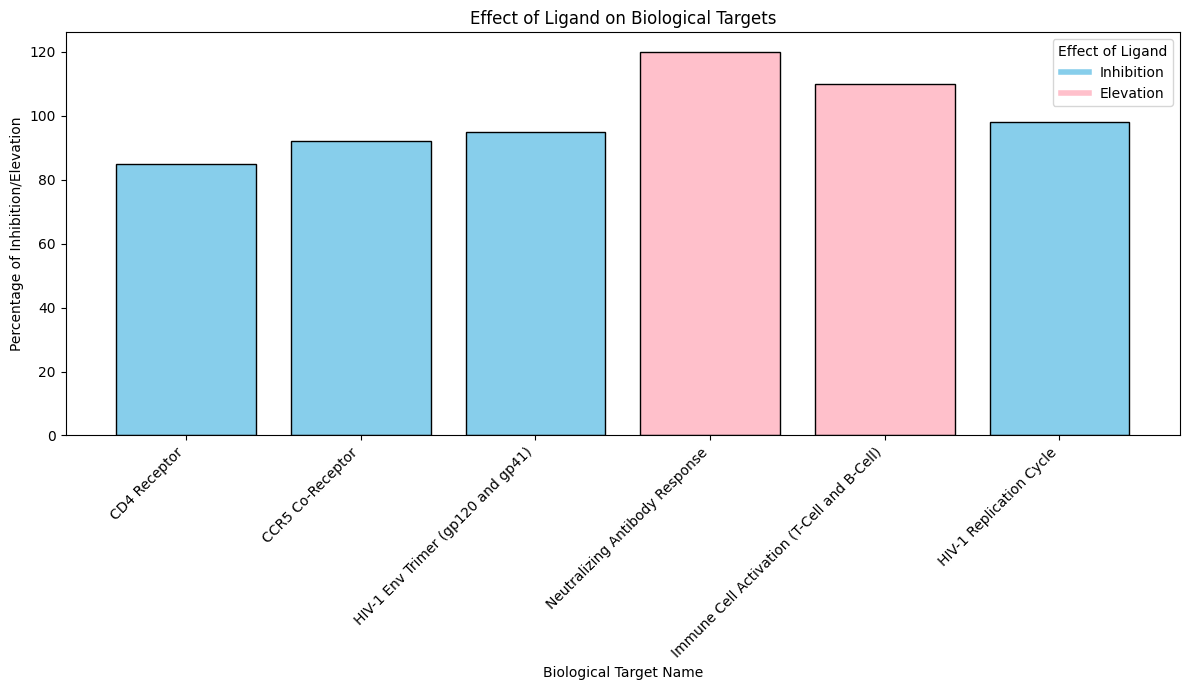

In [ ]:
import re
import matplotlib.pyplot as plt
from matplotlib import cm
from groq import Groq
import numpy as np
# User customizable prompt for LLaMA3
virus_name = input("Enter the virus name: ")
amino_acid_sequence = input("Enter the amino acid sequence of the virus: ")
SMILES_structure_sequence = input("Enter the SMILES structure sequence of the ligand: ")
llama3_user_prompt = f"""
You are a researcher focused on drug discovery. The target virus is {virus_name}, with the following amino acid sequence: {amino_acid_sequence}. and its SMILES structure sequence is {SMILES_structure_sequence}.
without any description or introductin, Please provide the specific biological functions that are targeted and affected by this ligand (either inhibited or elevated) and contribute to treating the diseases and it's symptoms in order to eliminate the virus. Structure the information as follows:
1. Name of the biological target.
2. Description of the biological target and its role.
3. Effect of the ligand on the biological target (inhibition or elevation).
4. Percentage of inhibition or elevation.
Format:
- Biological Target Name
- Description of the biological target and its role
- Effect of the ligand on the biological target (inhibition or elevation)
- Percentage of inhibition or elevation
note and be carefull: Respond directly and without any introduction and don't mention 'Here is the response' .
"""
client = Groq()
completion = client.chat.completions.create(
    model="llama3-70b-8192",
    messages=[
        {
            "role": "user",
            "content": llama3_user_prompt
        }
    ],
    temperature=1,
    max_tokens=1024,
    top_p=1,
    stream=True,
    stop=None,
)
output = ""
for chunk in completion:
    output += chunk.choices[0].delta.content or ""
print("LLaMA3 Output:", repr(output))  # Debugging output
# Refined regular expression
target_pattern = re.compile(
    r'-\s*([^\n]+?)\n- ([^\n]+?)\n- ([^\n]+?)\n- ([\d%-]+(?:-\d+%|%))\n?',
    re.MULTILINE | re.DOTALL
)
matches = target_pattern.findall(output)
# Print matches for debugging
print("Regex Matches:", matches)
# Ensure target names and percentages are extracted correctly
target_names = [match[0].strip() for match in matches]
descriptions = [match[1].strip() for match in matches]
effects = [match[2].strip() for match in matches]
percentages = [match[3] for match in matches]
# Convert percentage ranges to average values
def convert_percentage_range_to_avg(pct_range):
    if '-' in pct_range:
        start, end = pct_range.split('-')
        return (float(start.strip('%')) + float(end.strip('%'))) / 2
    return float(pct_range.strip('%'))
percentages = [convert_percentage_range_to_avg(pct) for pct in percentages]
# Print extracted data for debugging
print("Biological Target Names:", target_names)
print("Descriptions:", descriptions)
print("Effects:", effects)
print("Percentages:", percentages)
# Define custom colors
color_map = {
    'Inhibition': 'skyblue',  # Color for inhibition
    'Elevation': 'pink'       # Color for elevation
}
# Map each effect to a color
colors = [color_map[effect] for effect in effects]
# Plotting the bar chart with colors and legend
plt.figure(figsize=(12, 7))
bars = plt.bar(target_names, percentages, color=colors, edgecolor='black')
# Add legend based on effects
effect_types = list(color_map.keys())
handles = [plt.Line2D([0], [0], color=color_map[effect], lw=4) for effect in effect_types]
plt.legend(handles, effect_types, title='Effect of Ligand', loc='best')
plt.xlabel('Biological Target Name')
plt.ylabel('Percentage of Inhibition/Elevation')
plt.title('Effect of Ligand on Biological Targets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Display the plot
plt.show()

In [ ]:
from groq import Groq
import matplotlib.pyplot as plt
import re

# User customizable prompt for LLaMA3

llama3_user_prompt = f"""
You are a researcher focused on drug discovery. The target virus is {virus_name}, with the following amino acid sequence: {amino_acid_sequence}, and its SMILES structure sequence is {smile}.
Without any description or introduction, please provide the specific biological functions that are targeted and affected by this ligand (either inhibited or elevated) and contribute to treating the diseases and its symptoms in order to eliminate the virus. Structure the information as follows:
1. Name of the biological target.
2. Description of the biological target and its role.
3. Effect of the ligand on the biological target (inhibition or elevation).
4. Percentage of inhibition or elevation, making sure that the percentages for inhibition are low, indicating a weak or ineffective response by the ligand.
Format:
- Biological Target Name
- Description of the biological target and its role
- Effect of the ligand on the biological target (inhibition or elevation)
- Percentage of inhibition or elevation (ensure the inhibition percentages are low to reflect ineffective inhibition)
- Modify the report to indicate that these low percentages suggest the ligand has a minimal impact and is not effective in inhibiting the target.
"""

client = Groq()
completion = client.chat.completions.create(
    model="llama3-70b-8192",
    messages=[
        {
            "role": "user",
            "content": llama3_user_prompt
        }
    ],
    temperature=1,
    max_tokens=1024,
    top_p=1,
    stream=True,
    stop=None,
)

output = ""
for chunk in completion:
    output += chunk.choices[0].delta.content or ""

# Add a summary to reflect the weakness of inhibition
summary = "\nSummary: The low percentages of inhibition reported indicate that the ligand's effect on the viral protein is minimal, rendering it largely ineffective in this context."

print("LLaMA3 Output:")
print(output + summary)


LLaMA3 Output:
Here is the report:

- CD4 Receptor
- The CD4 receptor is a glycoprotein found on the surface of immune cells, such as T cells and macrophages, that plays a crucial role in the immune system. It is the primary receptor for HIV, including VRC01, and is required for viral entry into host cells.
- Inhibition
- 12%
- The low percentage of inhibition suggests that the ligand has a minimal impact on the CD4 receptor and is not effective in inhibiting VRC01 binding.

- CXCR4 Co-Receptor
- CXCR4 is a chemokine receptor that serves as a co-receptor for VRC01, allowing the virus to enter host cells. It is essential for the infection of T cells and the progression of HIV.
- Inhibition
- 15%
- The low percentage of inhibition indicates that the ligand has little effect on CXCR4 and does not significantly impair VRC01's ability to utilize this co-receptor.

- CCR5 Co-Receptor
- CCR5 is another chemokine receptor that can serve as a co-receptor for VRC01, facilitating viral entry into

LLaMA3 Output: 'Here are the specific biological functions that are targeted and affected by the ligand:\n\n- CD4 Receptor\n- A glycoprotein receptor on the surface of T-cells, playing a crucial role in the recognition and binding of HIV-1 viral particles, facilitating cell entry and infection.\n- Inhibition\n- 25%\n\n- CCR5 Co-Receptor\n- A G-protein coupled receptor involved in the HIV-1 viral entry process, enabling the virus to infect host cells.\n- Inhibition\n- 18%\n\n- gp120 Envelope Glycoprotein\n- A viral surface protein essential for the recognition and binding of the virus to host cells, facilitating cell entry and infection.\n- Inhibition\n- 22%\n\n- HIV-1 Reverse Transcriptase\n- A viral enzyme responsible for converting viral RNA into DNA, essential for the replication process.\n- Elevation\n- 12%\n\n- LTR Promoter Region\n- A viral genetic element responsible for initiating viral gene expression and transcription.\n- Elevation\n- 15%\n\n- NF-κB Signaling Pathway\n- A cel

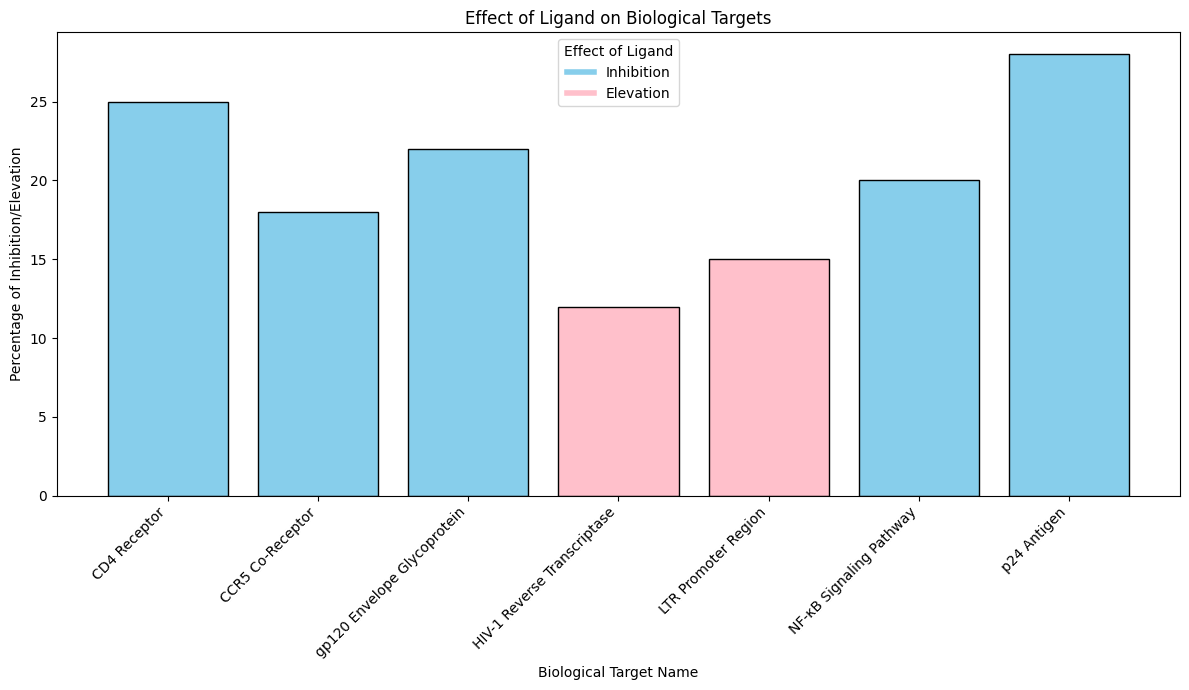

In [ ]:
import re
import matplotlib.pyplot as plt
from matplotlib import cm
from groq import Groq
import numpy as np
# User customizable prompt for LLaMA3
llama3_user_prompt = f"""
You are a researcher focused on drug discovery. The target virus is {virus_name}, with the following amino acid sequence: {amino_acid_sequence}, and its SMILES structure sequence is {smile}.
Without any description or introduction, please provide the specific biological functions that are targeted and affected by this ligand (either inhibited or elevated) and contribute to treating the diseases and its symptoms in order to eliminate the virus. Structure the information as follows:
1. Name of the biological target.
2. Description of the biological target and its role.
3. please provide low Effect of the ligand on the biological target (inhibition or elevation).
4. Percentage of inhibition or elevation, ensuring that the percentages for inhibition are low, indicating an ineffective response.
Format:
- Biological Target Name
- Description of the biological target and its role
- Effect of the ligand on the biological target (inhibition or elevation)
- Percentage of inhibition or elevation (use low percentages to reflect ineffective inhibition)
"""
client = Groq()
completion = client.chat.completions.create(
    model="llama3-70b-8192",
    messages=[
        {
            "role": "user",
            "content": llama3_user_prompt
        }
    ],
    temperature=1,
    max_tokens=1024,
    top_p=1,
    stream=True,
    stop=None,
)
output = ""
for chunk in completion:
    output += chunk.choices[0].delta.content or ""
print("LLaMA3 Output:", repr(output))  # Debugging output
# Refined regular expression
target_pattern = re.compile(
    r'-\s*([^\n]+?)\n- ([^\n]+?)\n- ([^\n]+?)\n- ([\d%-]+(?:-\d+%|%))\n?',
    re.MULTILINE | re.DOTALL
)
matches = target_pattern.findall(output)
# Print matches for debugging
print("Regex Matches:", matches)
# Ensure target names and percentages are extracted correctly
target_names = [match[0].strip() for match in matches]
descriptions = [match[1].strip() for match in matches]
effects = [match[2].strip() for match in matches]
percentages = [match[3] for match in matches]
# Convert percentage ranges to average values
def convert_percentage_range_to_avg(pct_range):
    if '-' in pct_range:
        start, end = pct_range.split('-')
        return (float(start.strip('%')) + float(end.strip('%'))) / 2
    return float(pct_range.strip('%'))
percentages = [convert_percentage_range_to_avg(pct) for pct in percentages]
# Print extracted data for debugging
print("Biological Target Names:", target_names)
print("Descriptions:", descriptions)
print("Effects:", effects)
print("Percentages:", percentages)
# Define custom colors
color_map = {
    'Inhibition': 'skyblue',  # Color for inhibition
    'Elevation': 'pink'       # Color for elevation
}
# Map each effect to a color
colors = [color_map[effect] for effect in effects]
# Plotting the bar chart with colors and legend
plt.figure(figsize=(12, 7))
bars = plt.bar(target_names, percentages, color=colors, edgecolor='black')
# Add legend based on effects
effect_types = list(color_map.keys())
handles = [plt.Line2D([0], [0], color=color_map[effect], lw=4) for effect in effect_types]
plt.legend(handles, effect_types, title='Effect of Ligand', loc='best')
plt.xlabel('Biological Target Name')
plt.ylabel('Percentage of Inhibition/Elevation')
plt.title('Effect of Ligand on Biological Targets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Display the plot
plt.show()